In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df["species"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Cleaning the dataset

In [5]:
columns = iris.feature_names

columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

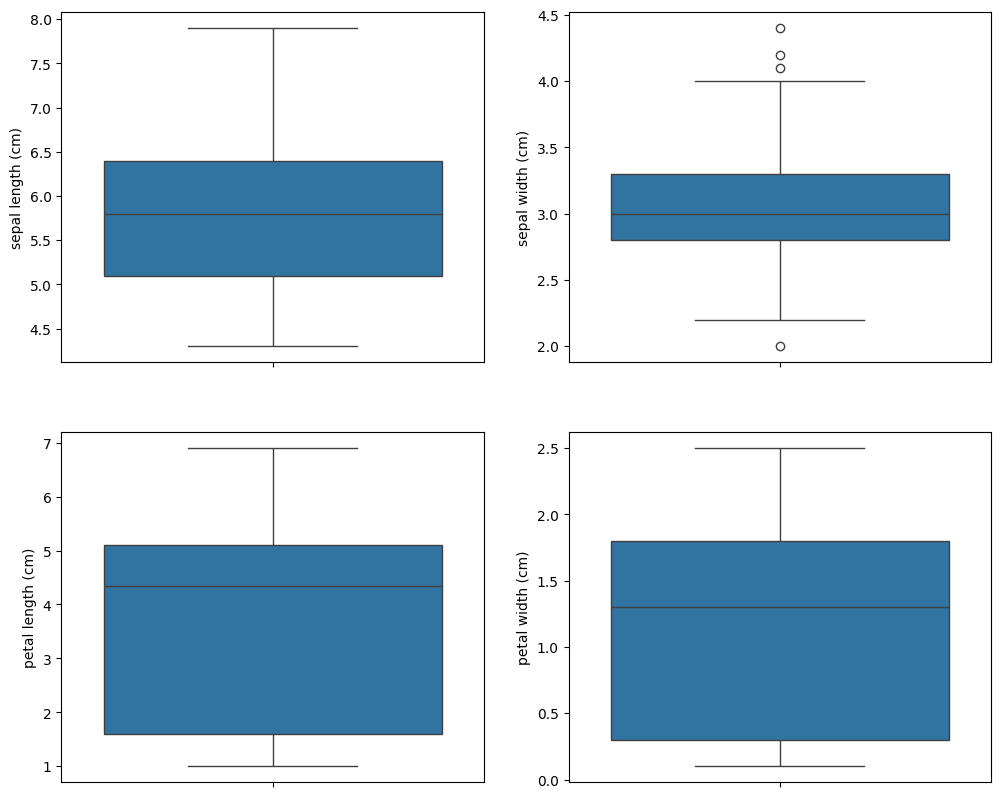

In [9]:
plt.figure(figsize=(12,10))

i = 1
for col in columns:
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
    i+=1

plt.show()

In [8]:
df["sepal width (cm)"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [10]:
q1 = df["sepal width (cm)"].quantile(0.25)
q3 = df["sepal width (cm)"].quantile(0.75)

IRQ = q3 - q1

IRQ

0.5

<Axes: ylabel='sepal width (cm)'>

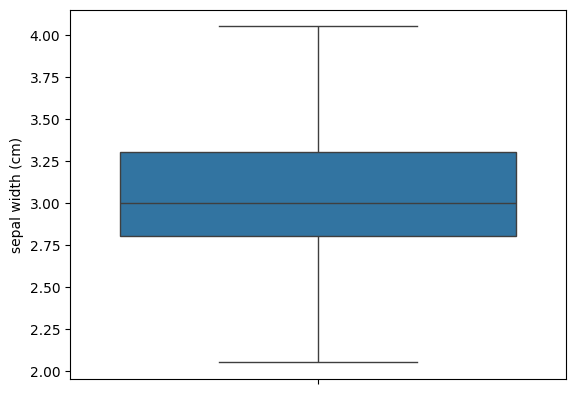

In [11]:
def remove_outlier(data, q1, q3, IRQ):
    low = q1 - 1.5*IRQ
    high = q3 + 1.5*IRQ

    if data > high:
        return high
    elif data < low:
        return low
    else:
        return data

df["sepal width (cm)"] = [remove_outlier(i, q1, q3, IRQ) for i in df["sepal width (cm)"]]

sns.boxplot(df["sepal width (cm)"])

## Spliting the data

In [20]:
x = df.drop(["species"], axis=1).values
y = df["species"].values

x

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.05, 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

x_test.shape

(45, 4)

## Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test

array([[ 0.3100623 , -0.50632421,  0.484213  , -0.05282593],
       [-0.17225683,  1.92125762, -1.26695916, -1.27039917],
       [ 2.23933883, -0.99184057,  1.76840592,  1.43531914],
       [ 0.18948252, -0.26356603,  0.36746819,  0.35303182],
       [ 1.15412078, -0.50632421,  0.54258541,  0.2177459 ],
       [-0.53399618,  0.95022489, -1.38370397, -1.13511325],
       [-0.29283662, -0.26356603, -0.15788346,  0.08245999],
       [ 1.27470056,  0.22195034,  0.71770262,  1.43531914],
       [ 0.43064208, -1.9628733 ,  0.36746819,  0.35303182],
       [-0.05167705, -0.74908239,  0.01723376, -0.05282593],
       [ 0.79238143,  0.46470852,  0.71770262,  1.0294614 ],
       [-1.25747488, -0.02080784, -1.44207638, -1.540971  ],
       [-0.4134164 ,  1.19298307, -1.50044878, -1.40568508],
       [-1.1368951 ,  0.22195034, -1.38370397, -1.540971  ],
       [-0.89573553,  1.92125762, -1.38370397, -1.27039917],
       [ 0.55122187,  0.7074667 ,  0.484213  ,  0.48831773],
       [ 0.79238143, -0.

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [25]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Error calculation

In [28]:
def count_error(y_test, y_pred):
    count = 0
    for i in range(0,len(y_test)):
        if y_pred[i] != y_test[i]:
            count += 1
    print("Total error",count)

count_error(y_test, y_pred)

Total error 0


In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.0

## Visualization

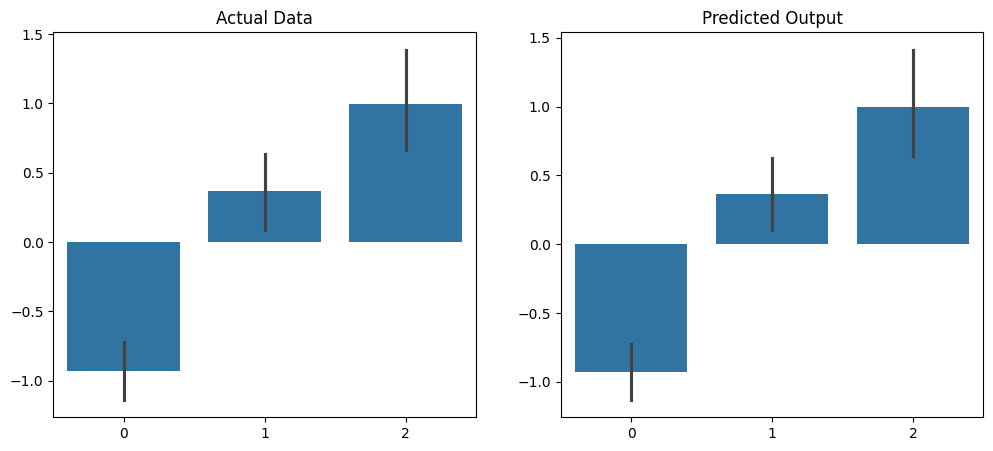

In [38]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x = y_test, y=x_test[:,0]).set_title("Actual Data")
plt.subplot(1,2,2)
sns.barplot(x = y_pred, y=x_test[:,0]).set_title("Predicted Output")

plt.show()